In [1]:
# setting environment and import packages
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# read in data
data_raw = pd.read_csv('data/results.csv')

In [3]:
# check data shape
data_raw.shape

(31984, 21)

In [4]:
data_raw.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


In [5]:
# check data info
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31984 entries, 0 to 31983
Data columns (total 21 columns):
10k          31984 non-null object
name         31984 non-null object
division     31984 non-null int64
25k          31984 non-null object
gender       31984 non-null object
age          31984 non-null int64
official     31984 non-null float64
bib          31984 non-null object
genderdiv    31984 non-null int64
ctz          1244 non-null object
35k          31984 non-null object
overall      31984 non-null int64
pace         31984 non-null float64
state        29408 non-null object
30k          31984 non-null object
5k           31984 non-null object
half         31984 non-null object
20k          31984 non-null object
country      31984 non-null object
city         31983 non-null object
40k          31984 non-null object
dtypes: float64(2), int64(4), object(15)
memory usage: 5.1+ MB


We can tell that most of the value in `ctz` column is null, we can drop it since it will not be helpful for our clustering information

In [6]:
# drop ctz column
data = data_raw.copy()
data.drop('ctz', axis=1, inplace=True)

# further drop the rows with missing value
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29408 entries, 9 to 31983
Data columns (total 20 columns):
10k          29408 non-null object
name         29408 non-null object
division     29408 non-null int64
25k          29408 non-null object
gender       29408 non-null object
age          29408 non-null int64
official     29408 non-null float64
bib          29408 non-null object
genderdiv    29408 non-null int64
35k          29408 non-null object
overall      29408 non-null int64
pace         29408 non-null float64
state        29408 non-null object
30k          29408 non-null object
5k           29408 non-null object
half         29408 non-null object
20k          29408 non-null object
country      29408 non-null object
city         29408 non-null object
40k          29408 non-null object
dtypes: float64(2), int64(4), object(14)
memory usage: 4.7+ MB


Now we have nearly 30K rows and we do not miss too much information from the original data

In [8]:
# check how many unique values in each column
data.nunique()

10k           2727
name         29348
division      6953
25k           6472
gender           2
age             64
official     10739
bib          29408
genderdiv    17216
35k           9289
overall      29387
pace           710
state           68
30k           7918
5k            1466
half          5556
20k           5285
country          2
city          4668
40k          10272
dtype: int64

In [9]:
(data == '-').sum()

10k           46
name           0
division       0
25k          198
gender         0
age            0
official       0
bib            0
genderdiv      0
35k           30
overall        0
pace           0
state          0
30k           36
5k            48
half          66
20k           49
country        0
city           0
40k           38
dtype: int64

In [10]:
# replace '-' with missing value since it is a form of missing value itself
data.replace(to_replace='-', value=np.nan, inplace=True)

In [11]:
# double check the result
(data == '-').sum()

10k          0
name         0
division     0
25k          0
gender       0
age          0
official     0
bib          0
genderdiv    0
35k          0
overall      0
pace         0
state        0
30k          0
5k           0
half         0
20k          0
country      0
city         0
40k          0
dtype: int64

In [12]:
# drop the missing value again
data.dropna(inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29103 entries, 9 to 31983
Data columns (total 20 columns):
10k          29103 non-null object
name         29103 non-null object
division     29103 non-null int64
25k          29103 non-null object
gender       29103 non-null object
age          29103 non-null int64
official     29103 non-null float64
bib          29103 non-null object
genderdiv    29103 non-null int64
35k          29103 non-null object
overall      29103 non-null int64
pace         29103 non-null float64
state        29103 non-null object
30k          29103 non-null object
5k           29103 non-null object
half         29103 non-null object
20k          29103 non-null object
country      29103 non-null object
city         29103 non-null object
40k          29103 non-null object
dtypes: float64(2), int64(4), object(14)
memory usage: 4.7+ MB


We have definitely lost some infomration from the data cleaning, but now we are in better shape, next step is to transform some data columns that should be numerical instead of categorical.

In [14]:
data.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
9,30.48,"Hall, Ryan",20,77.68,M,31,137.83,6,20,112.27,20,5.27,CA,94.78,15.15,65.23,61.78,USA,Redding,129.83
14,17.12,"Cassidy, Josh R.",13,48.88,M,29,87.40,W8,13,72.83,13,3.35,ON,60.82,8.02,40.20,38.02,CAN,Port Elgin,82.38
15,33.93,"Linden, Desiree",10,85.03,F,30,143.90,F8,10,119.68,46,5.50,MI,102.40,16.92,71.68,67.92,USA,Rochester Hills,136.47
24,18.30,"Filteau, Michel",14,50.33,M,47,89.40,W13,14,74.95,14,3.42,QC,62.33,8.67,41.80,39.63,CAN,St-Jean Baptiste,84.48
27,18.78,"Kim, Gyu Dae",15,50.33,M,30,89.52,W14,15,75.02,15,3.42,IL,62.72,8.98,41.82,39.65,USA,Champaign,84.75


In [14]:
# transform categorical data into numerical
cat = ['5k', '10k', '20k', '25k', '30k', '35k', '40k', 'half']
data[cat] = data[cat].astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29103 entries, 9 to 31983
Data columns (total 20 columns):
10k          29103 non-null float64
name         29103 non-null object
division     29103 non-null int64
25k          29103 non-null float64
gender       29103 non-null object
age          29103 non-null int64
official     29103 non-null float64
bib          29103 non-null object
genderdiv    29103 non-null int64
35k          29103 non-null float64
overall      29103 non-null int64
pace         29103 non-null float64
state        29103 non-null object
30k          29103 non-null float64
5k           29103 non-null float64
half         29103 non-null float64
20k          29103 non-null float64
country      29103 non-null object
city         29103 non-null object
40k          29103 non-null float64
dtypes: float64(10), int64(4), object(6)
memory usage: 4.7+ MB


Next we will drop the categorical columns that is almost all different between row to row. We will also drop the original numeric columns like `overall` and `genderdiv` since those are like an ID number that does not really provide helpful information for clustering

In [16]:
to_drop = ['name', 'bib', 'genderdiv', 'overall', 'division']
data.drop(to_drop, axis=1, inplace=True)

Next, we will transform categorical variables into dummy variables since our clustering algorithm can not handle categorical variables

In [17]:
# save the numerica variables before transforming categorical to dummies
cols = data.select_dtypes(['number']).columns

In [18]:
data = pd.get_dummies(data)

In [19]:
# split into training and testing set before scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data, test_size=0.3, random_state=1009)

In [20]:
# normalize the numeric columns
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train[cols] = scale.fit_transform(X_train[cols])

In [21]:
# apply normalization on the test set
X_test[cols] = scale.transform(X_test[cols])

### K-means

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3).fit(X_train)

In [25]:
# attach label to a copy of original data
X_train_c = X_train.copy()
X_train_c['K_means'] = kmeans.labels_

In [24]:
# examine some groups that have been put into the same cluster 0
X_train_c[X_train_c['K_means']==0].head()

,10k,25k,age,official,35k,pace,30k,5k,half,20k,...,city_Yukon,city_Zeeland,city_Zephyr Cove,city_Zephyrhills,city_Zimmerman,city_Zionsville,city_abington,city_brookline,city_woburn,K_means
8532,-1.058071,-1.038031,-1.589151,-1.069695,-1.039363,-1.074510,-1.033609,-1.036469,-1.039495,-1.035398,...,0,0,0,0,0,0,0,0,0,0
3725,-1.241940,-1.233189,0.080387,-1.366447,-1.292246,-1.362482,-1.249563,-1.207496,-1.243096,-1.240207,...,0,0,0,0,0,0,0,0,0,0
8181,-1.130470,-0.828821,-0.886188,-0.424019,-0.430390,-0.421433,-0.661453,-1.164739,-0.929826,-0.942113,...,0,0,0,0,0,0,0,0,0,0
854,-1.073011,-1.089552,-1.501280,-1.197378,-1.154066,-1.203069,-1.114592,-1.060223,-1.081297,-1.083864,...,0,0,0,0,0,0,0,0,0,0
1774,-1.279863,-1.254266,-0.271095,-1.323297,-1.279529,-1.321343,-1.258056,-1.278757,-1.264243,-1.263659,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# examine some groups that have been put into the same cluster 1
X_train_c[X_train_c['K_means']==1].head()

,10k,25k,age,official,35k,pace,30k,5k,half,20k,...,city_Yukon,city_Zeeland,city_Zephyr Cove,city_Zephyrhills,city_Zimmerman,city_Zionsville,city_abington,city_brookline,city_woburn,K_means
30854,1.121924,1.098174,0.168257,1.115051,1.138024,1.110986,1.122897,1.096611,1.160279,1.187282,...,0,0,0,0,0,0,0,0,0,1
17443,2.084937,2.050548,2.716499,1.938425,1.888113,1.933762,1.854471,1.832975,2.217627,1.997139,...,0,0,0,0,0,0,0,0,0,1
29393,1.719497,1.264840,-1.061928,0.837520,0.992995,0.838442,1.123807,1.904236,1.366831,1.390528,...,0,0,0,0,0,0,0,0,0,1
25720,2.414751,2.397149,-0.622576,2.033551,2.211187,2.031466,2.342794,1.980248,2.491554,2.470338,...,0,0,0,0,0,0,0,0,0,1
27301,1.165592,0.829636,0.080387,0.977365,0.939435,0.977285,0.870546,1.424412,0.933073,0.955373,...,0,0,0,0,0,0,0,0,0,1


In [26]:
# examine some groups that have been put into the same cluster 2
X_train_c[X_train_c['K_means']==2].head()

,10k,25k,age,official,35k,pace,30k,5k,half,20k,...,city_Yukon,city_Zeeland,city_Zephyr Cove,city_Zephyrhills,city_Zimmerman,city_Zionsville,city_abington,city_brookline,city_woburn,K_means
25125,0.239353,-0.040380,0.343998,-0.160806,-0.155740,-0.164315,-0.124298,0.376875,0.037524,0.052230,...,0,0,0,0,0,0,0,0,0,2
14466,-0.174352,-0.257006,-0.622576,-0.505415,-0.407156,-0.508852,-0.329029,-0.205091,-0.205912,-0.202088,...,0,0,0,0,0,0,0,0,0,2
24907,0.227861,0.079447,-0.358965,-0.153941,-0.055956,-0.154031,0.025536,0.312740,0.117685,0.117373,...,0,0,0,0,0,0,0,0,0,2
22771,0.455399,0.207081,-0.271095,0.152029,0.061192,0.154510,0.116831,0.514646,0.288336,0.301337,...,0,0,0,0,0,0,0,0,0,2
25268,0.096855,0.527531,-1.325540,0.759263,0.611714,0.761307,0.571487,0.046698,0.455545,0.457680,...,0,0,0,0,0,0,0,0,0,2


We will first do some visualization between three clusters and see if they are really different, we will examine the time finished for 5k, 20k, 30k and 40k

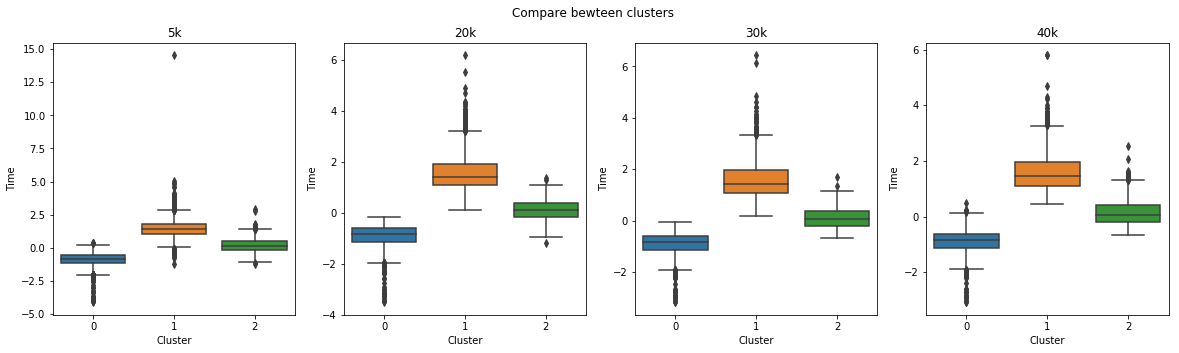

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
sns.boxplot(x='K_means', y='5k', data=X_train_c, ax=ax1)
ax1.set_title('5k')
sns.boxplot(x='K_means', y='20k', data=X_train_c, ax=ax2)
ax2.set_title('20k')
sns.boxplot(x='K_means', y='30k', data=X_train_c, ax=ax3)
ax3.set_title('30k')
sns.boxplot(x='K_means', y='40k', data=X_train_c, ax=ax4)
ax4.set_title('40k')
for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Time')
fig.suptitle('Compare bewteen clusters')
plt.show()

We can see that there are definitely a trend between these three groups, cluster 2 clearly takes more time in every distance category and the rank is consistent as well. Within cluster, they all have small variance, that surely implied K-means clustering method has truly gathered similar subject in the same group. Let's examine other columns as well to see the distribution.

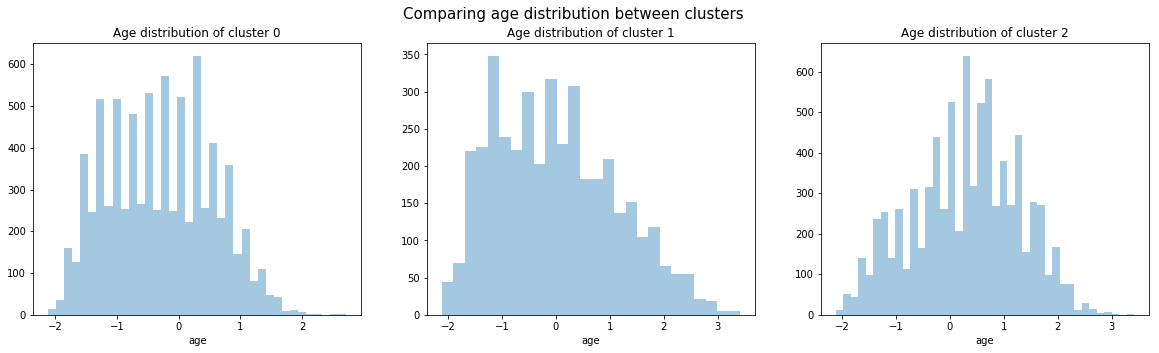

In [28]:
# check the age distribution in each group
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
sns.distplot(X_train_c[X_train_c['K_means']==0]['age'], kde=False, ax=ax1)
ax1.set_title('Age distribution of cluster 0')
sns.distplot(X_train_c[X_train_c['K_means']==1]['age'], kde=False, ax=ax2)
ax2.set_title('Age distribution of cluster 1')
sns.distplot(X_train_c[X_train_c['K_means']==2]['age'], kde=False, ax=ax3)
ax3.set_title('Age distribution of cluster 2')
fig.suptitle('Comparing age distribution between clusters', fontsize=15)
plt.show()

They clearly look different, we will summarize the data to see how different they look

In [29]:
X_train_c.groupby('K_means')['age'].describe().T

K_means,0,1,2
count,8152.000000,4035.000000,8185.000000
mean,-0.298635,-0.012950,0.303815
std,0.849512,1.126526,0.981692
min,-2.116373,-2.116373,-2.116373
25%,-0.974058,-0.974058,-0.358965
50%,-0.271095,-0.095354,0.343998
75%,0.343998,0.783350,1.046961
max,2.716499,3.419462,3.419462


We can see that cluster 0 definitely has a younger group than the other two, this is consistent to our previous observation, since younger people should run faster than older people in general. Next we will calculate the silhouette coefficient to determine the performance of the clustering method. Before that, let's first divide X_train into four subsets to see if there are variances between subsets.

In [24]:
# make sure X_train can be evenly split into 4 subsets
rows = X_train.shape[0] - X_train.shape[0] % 4
X_train = X_train.iloc[:rows, :]

In [25]:
# split X_train into X1_raw, X2_raw
X1_raw, X2_raw, y1, y2 = train_test_split(X_train, X_train, test_size=0.5, random_state=1009)
# split X1_raw into new X1, X2
X1, X2, y1, y2 = train_test_split(X1_raw, X1_raw, test_size=0.5, random_state=1009)
# split X2_raw into new X3, X4
X3, X4, y3, y4 = train_test_split(X2_raw, X2_raw, test_size=0.5, random_state=1009)

In [32]:
# caculate silhouette coefficient
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for i, sample in enumerate([X1, X2, X3, X4]):
    model = KMeans(n_clusters=3, random_state=1009).fit(sample)
    labels = model.labels_
    print('Round {}:'.format(i+1), metrics.silhouette_score(sample, labels, metric='euclidean'))

Round 1: 0.26174513165077495
Round 2: 0.26600033285388736
Round 3: 0.27215376468244173
Round 4: 0.2713121458705137


Looks like the score is pretty consistent, let's specify K = 5 to see how the score varies before jumping into next algorithm

In [33]:
# calculate silhouette coefficient for K = 5
for i, sample in enumerate([X1, X2, X3, X4]):
    model = KMeans(n_clusters=5, random_state=1009).fit(sample)
    labels = model.labels_
    print('Round {}:'.format(i+1), metrics.silhouette_score(sample, labels, metric='euclidean'))

Round 1: 0.16868170411486438
Round 2: 0.17226179365898797
Round 3: 0.17608338754144084
Round 4: 0.17375314261755584


We can see that further divide into 5 clusters did not perform as well as the previous 3 clusters, the score get worse. Lastly, let's apply the algorithm on the test set and see how it performs. We first have to normalize the test data before applying.

In [35]:
model = KMeans(n_clusters=3, random_state=1009).fit(X_train)
print('K-means algorithm on test set, silhouette coefficient: {}' \
      .format(metrics.silhouette_score(X_test, model.predict(X_test), metric='euclidean')))

K-means algorithm on test set, silhouette coefficient: 0.2651127448055414


### Mean-shift

In [36]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# estimate bandwidth
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=1500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

MeanShift(bandwidth=3.097807102885365, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [37]:
# add the label into a new column
X_train_c['Mean_shift'] = ms.labels_

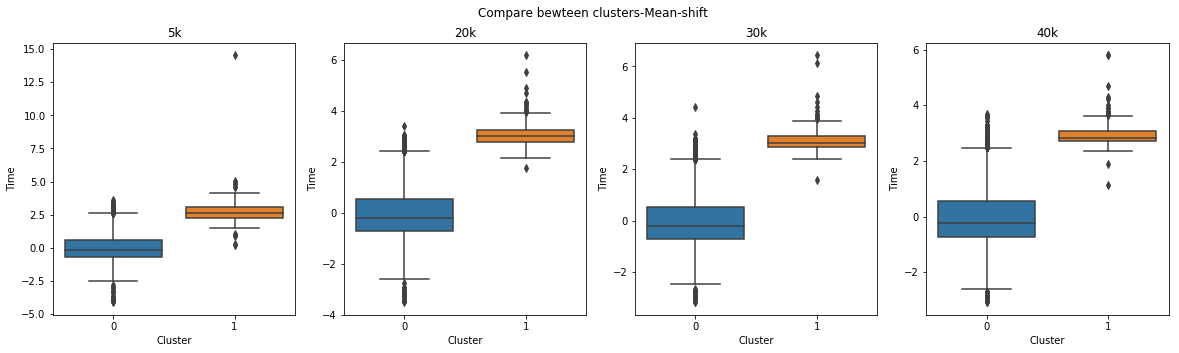

In [38]:
# repeat the process of K-means to see the difference between clusters assigned by mean-shift algorithms
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
sns.boxplot(x='Mean_shift', y='5k', data=X_train_c, ax=ax1)
ax1.set_title('5k')
sns.boxplot(x='Mean_shift', y='20k', data=X_train_c, ax=ax2)
ax2.set_title('20k')
sns.boxplot(x='Mean_shift', y='30k', data=X_train_c, ax=ax3)
ax3.set_title('30k')
sns.boxplot(x='Mean_shift', y='40k', data=X_train_c, ax=ax4)
ax4.set_title('40k')
for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Time')
fig.suptitle('Compare bewteen clusters-Mean-shift')
plt.show()

In [39]:
# display the summary
X_train_c.groupby('Mean_shift')[['5k', '20k', '30k', '40k']].describe().T

Mean_shift             0           1
5k  count   20142.000000  230.000000
    mean       -0.030916    2.707410
    std         0.956336    1.037094
    min        -4.133950    0.170218
    25%        -0.727672    2.255791
    50%        -0.167085    2.622785
    75%         0.609661    3.043225
    max         3.619252   14.529318
20k count   20142.000000  230.000000
    mean       -0.035313    3.092498
    std         0.947673    0.507313
    min        -3.513437    1.767836
    25%        -0.717500    2.792014
    50%        -0.185933    3.020927
    75%         0.535330    3.251533
    max         3.412045    6.180884
30k count   20142.000000  230.000000
    mean       -0.035656    3.122502
    std         0.946641    0.489900
    min        -3.177376    1.599694
    25%        -0.717261    2.848254
    50%        -0.208313    3.029024
    75%         0.521441    3.280313
    max         4.399209    6.425597
40k count   20142.000000  230.000000
    mean       -0.033620    2.944198
    std         0.953314    0.473049
    min        -3.086862    1.132930
    25%        -0.724608    2.698348
    50%        -0.216989    2.831940
    75%         0.557348    3.071286
    max         3.671026    5.791704

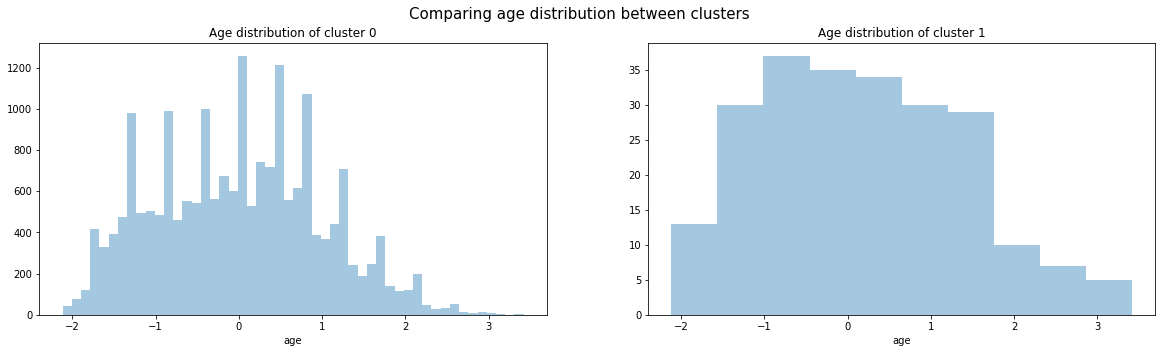

In [40]:
# check the age distribution in each group
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(X_train_c[X_train_c['Mean_shift']==0]['age'], kde=False, ax=ax1)
ax1.set_title('Age distribution of cluster 0')
sns.distplot(X_train_c[X_train_c['Mean_shift']==1]['age'], kde=False, ax=ax2)
ax2.set_title('Age distribution of cluster 1')

fig.suptitle('Comparing age distribution between clusters', fontsize=15)
plt.show()

In [41]:
X_train_c.groupby('Mean_shift')['age'].describe().T

Mean_shift,0,1
count,20142.000000,230.000000
mean,-0.001969,0.172460
std,0.997077,1.221473
min,-2.116373,-2.116373
25%,-0.798317,-0.798317
50%,-0.007484,0.124322
75%,0.695480,1.046961
max,3.419462,3.419462


We can clearly see clusters generated by Mean-shift algorithm has large imbalance between groups, a majority of subject is in cluster 0 while only 230 subjects are in cluster 1. Our next step is to calculate the silhouette coefficient of Mean-shift algorithm

In [42]:
# caculate silhouette coefficient
for i, sample in enumerate([X1, X2, X3, X4]):
    bandwidth = estimate_bandwidth(sample, quantile=0.2, n_samples=len(sample)//10)

    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(sample)
    
    labels = ms.labels_
    print('Round {}:'.format(i+1), metrics.silhouette_score(sample, labels, metric='euclidean'))

Round 1: 0.2643760483572636
Round 2: 0.26213822957998334
Round 3: 0.24927319846131618
Round 4: 0.2876487870082548


Looks like the score varies a bit, not as consistent as the one we got in K-means algorithm, there might be other hyperparameters to tune like bandwidth to improve the performance though. We will apply it on the test set to see how it performs.

In [43]:
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=1500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)
print('M-shift algorithm on test set, silhouette coefficient: {}' \
      .format(metrics.silhouette_score(X_test, ms.predict(X_test), metric='euclidean')))

M-shift algorithm on test set, silhouette coefficient: 0.4846162195651808


The last algorithm we will try is the spectral clustering

### Spectral clustering

In [23]:
from sklearn.cluster import SpectralClustering


# Declare and fit the model.
sc = SpectralClustering(n_clusters=3)
sc.fit(X_train)


SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=3, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

In [26]:
# add the label into a new column
X_train_c['Spectral_clustering'] = sc.labels_

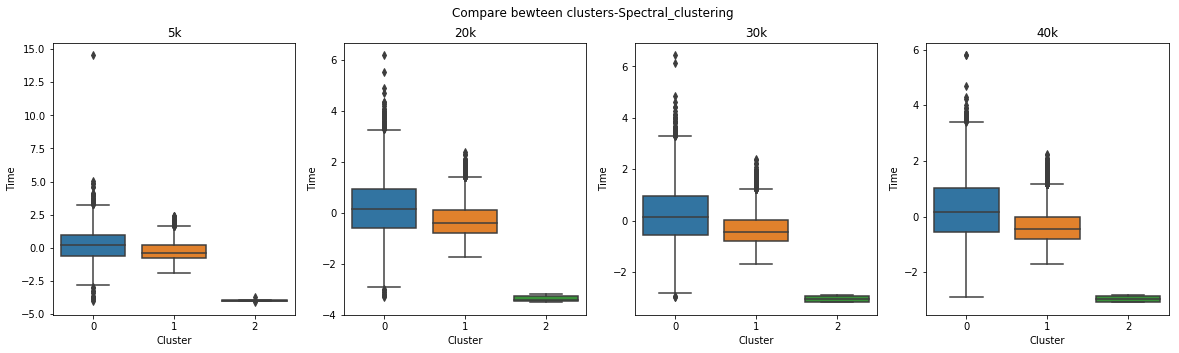

In [27]:
# repeat the process of K-means to see the difference between clusters assigned by spectral-clustering algorithms
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20, 5))
sns.boxplot(x='Spectral_clustering', y='5k', data=X_train_c, ax=ax1)
ax1.set_title('5k')
sns.boxplot(x='Spectral_clustering', y='20k', data=X_train_c, ax=ax2)
ax2.set_title('20k')
sns.boxplot(x='Spectral_clustering', y='30k', data=X_train_c, ax=ax3)
ax3.set_title('30k')
sns.boxplot(x='Spectral_clustering', y='40k', data=X_train_c, ax=ax4)
ax4.set_title('40k')
for ax in (ax1, ax2, ax3, ax4):
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Time')
fig.suptitle('Compare bewteen clusters-Spectral_clustering')
plt.show()

In [29]:
# display the summary
X_train_c.groupby('Spectral_clustering')[['5k', '20k', '30k', '40k']].describe().T

Spectral_clustering             0            1         2
5k  count            11062.000000  9304.000000  6.000000
    mean                 0.188779    -0.221893 -3.962527
    std                  1.127718     0.758950  0.139282
    min                 -4.003304    -1.943860 -4.133950
    25%                 -0.613654    -0.779930 -4.005086
    50%                  0.177344    -0.364240 -3.997366
    75%                  0.935086     0.193971 -3.943326
    max                 14.529318     2.419691 -3.713509
20k count            11062.000000  9304.000000  6.000000
    mean                 0.229303    -0.270460 -3.365780
    std                  1.140505     0.707304  0.143181
    min                 -3.297684    -1.720702 -3.513437
    25%                 -0.600763    -0.772220 -3.466925
    50%                  0.159065    -0.391264 -3.413899
    75%                  0.948598     0.097570 -3.246742
    max                  6.180884     2.389561 -3.177821
30k count            11062.000000  9304.000000  6.000000
    mean                 0.253275    -0.299170 -3.041697
    std                  1.140522     0.686631  0.127809
    min                 -2.973858    -1.671158 -3.177376
    25%                 -0.575010    -0.777998 -3.151595
    50%                  0.141702    -0.431547 -3.055296
    75%                  0.966012     0.026142 -2.936703
    max                  6.425597     2.381011 -2.881350
40k count            11062.000000  9304.000000  6.000000
    mean                 0.273097    -0.322792 -2.957261
    std                  1.132070     0.683762  0.116176
    min                 -2.885929    -1.688836 -3.086862
    25%                 -0.555920    -0.791689 -3.056328
    50%                  0.162378    -0.457735 -2.961512
    75%                  1.028835    -0.013775 -2.869029
    max                  5.791704     2.242725 -2.807547

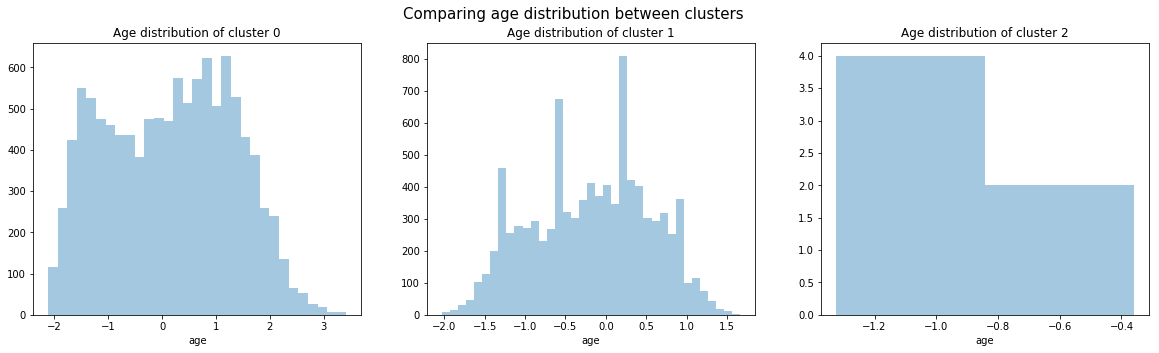

In [31]:
# check the age distribution in each group
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
sns.distplot(X_train_c[X_train_c['Spectral_clustering']==0]['age'], kde=False, ax=ax1)
ax1.set_title('Age distribution of cluster 0')
sns.distplot(X_train_c[X_train_c['Spectral_clustering']==1]['age'], kde=False, ax=ax2)
ax2.set_title('Age distribution of cluster 1')
sns.distplot(X_train_c[X_train_c['Spectral_clustering']==2]['age'], kde=False, ax=ax3)
ax3.set_title('Age distribution of cluster 2')

fig.suptitle('Comparing age distribution between clusters', fontsize=15)
plt.show()

In [32]:
X_train_c.groupby('Spectral_clustering')['age'].describe().T

Spectral_clustering,0,1,2
count,11062.000000,9304.000000,6.000000
mean,0.154038,-0.182544,-0.930123
std,1.157874,0.730499,0.391985
min,-2.116373,-2.028503,-1.325540
25%,-0.886188,-0.710447,-1.193734
50%,0.256128,-0.183224,-1.061928
75%,1.134832,0.343998,-0.666512
max,3.419462,1.662054,-0.358965


In [35]:
# caculate silhouette coefficient
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for i, sample in enumerate([X1, X2, X3, X4]):
    model = SpectralClustering(n_clusters=3, random_state=1009).fit(sample)
    labels = model.labels_
    print('Round {}:'.format(i+1), metrics.silhouette_score(sample, labels, metric='euclidean'))

Round 1: 0.08044796130414808
Round 2: 0.07919586966159561
Round 3: 0.09703187792114921
Round 4: 0.07303964702596262


In [27]:
# change the number of cluster to 5
from sklearn import metrics
for i, sample in enumerate([X1, X2, X3, X4]):
    model = SpectralClustering(n_clusters=5, random_state=1009).fit(sample)
    labels = model.labels_
    print('Round {}:'.format(i+1), metrics.silhouette_score(sample, labels, metric='euclidean'))

Round 1: 0.3778435874196367
Round 2: 0.36840837141299765
Round 3: 0.21908206950533554
Round 4: 0.29901688508529906


In [37]:
sc = SpectralClustering(n_clusters=3, random_state=1009)

print('SpectralClustering algorithm on test set, silhouette coefficient: {}' \
      .format(metrics.silhouette_score(X_test, sc.fit_predict(X_test), metric='euclidean')))

SpectralClustering algorithm on test set, silhouette coefficient: -0.047967426432631494


In [28]:
sc = SpectralClustering(n_clusters=5, random_state=1009)

print('SpectralClustering algorithm on test set, silhouette coefficient: {}' \
      .format(metrics.silhouette_score(X_test, sc.fit_predict(X_test), metric='euclidean')))

SpectralClustering algorithm on test set, silhouette coefficient: 0.24676545285685716


### Conclusion
We can see that by comparing those three algorithms, the Means-shift has the best performance of clustering on the test set by the criteria using silhouette score, however, it also takes the longest time to train the model. Especially we have to estimate the suitable bandwidth first. K-means is the general method that is simple and also easy to train, the only problem is we need to specify the number of clusters first, we can also see that by using 5 cluster, the score decreased. Spectral clustering did not work well in our data, when we tried to increase the number of cluster, the score increased though, but it seems that there are overfitting issue since it varies a lot from round to round. The advantage of Spectral clustering is it runs relatively fast than the other two.